In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recommended setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Loading   dataset 
df = pd.read_csv("User_and_Admin_Activity_Data_1.csv")

In [3]:
categorical_cols = [
    'RecordType', 'Operation', 'UserId', 'ResultStatus', 'Workload',
     'GeoLocation', 'ApplicationDisplayName', 'LogonError'
]

# Bivariate Analysis – Feature vs Target. Let’s assume target label is IsLoginFailure.

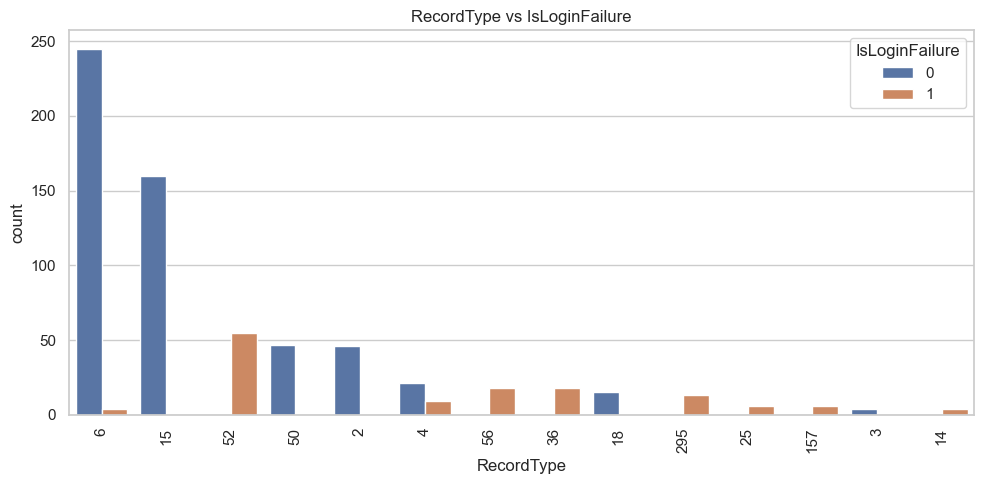

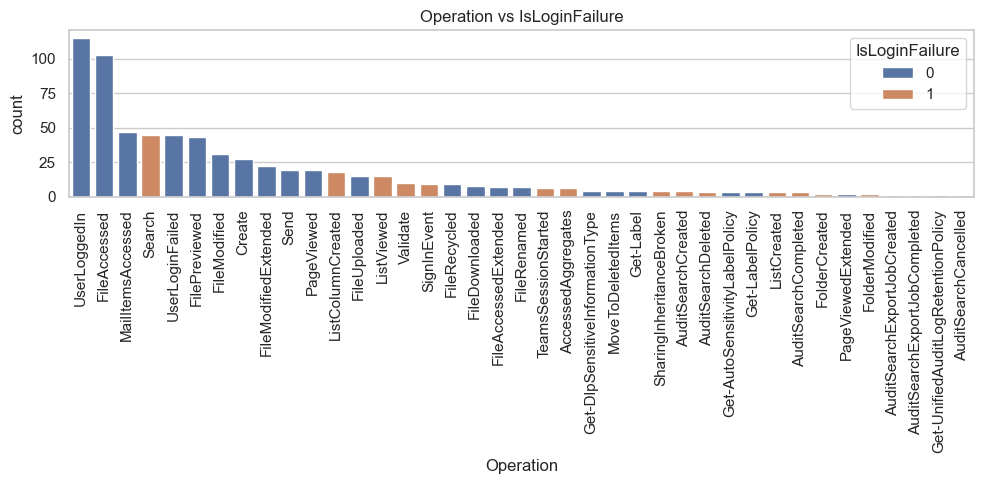

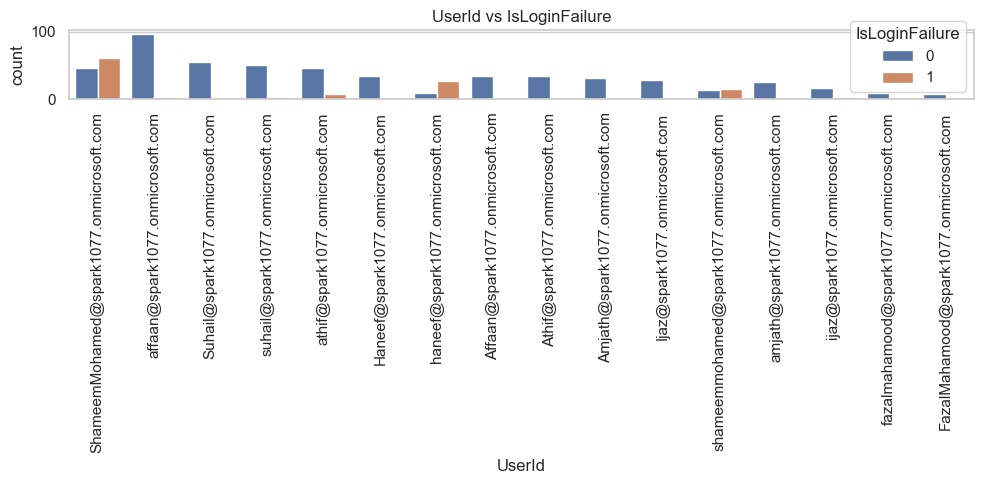

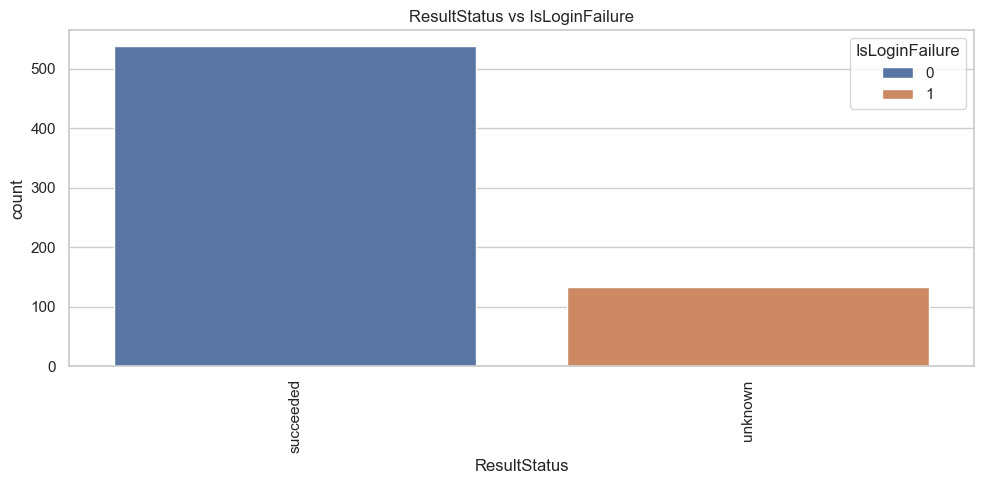

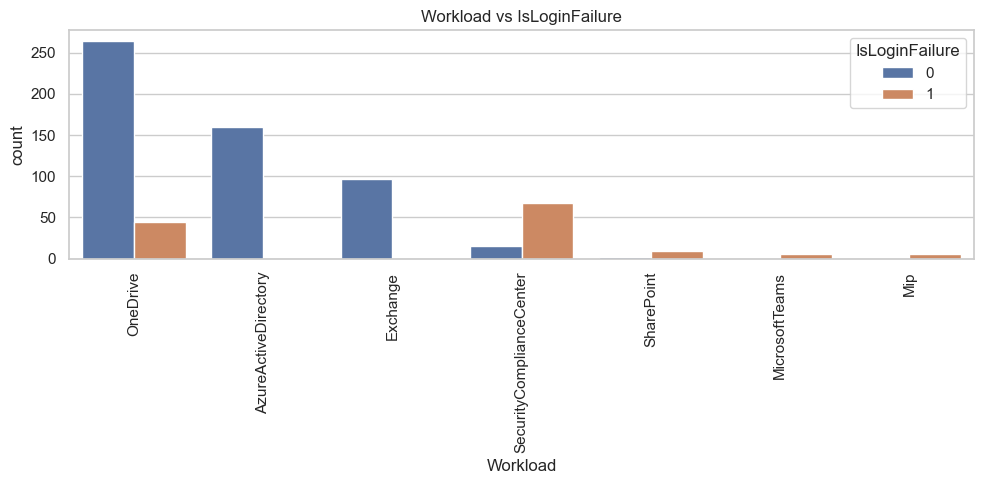

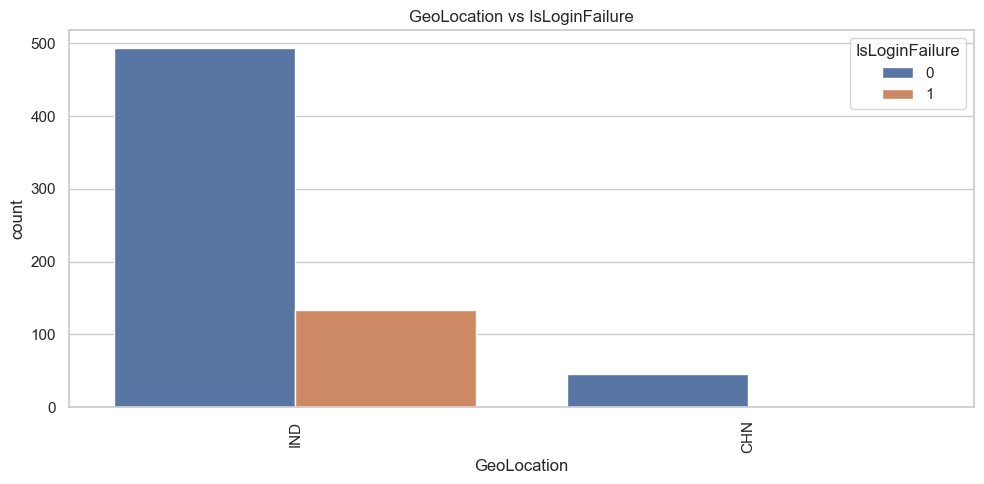

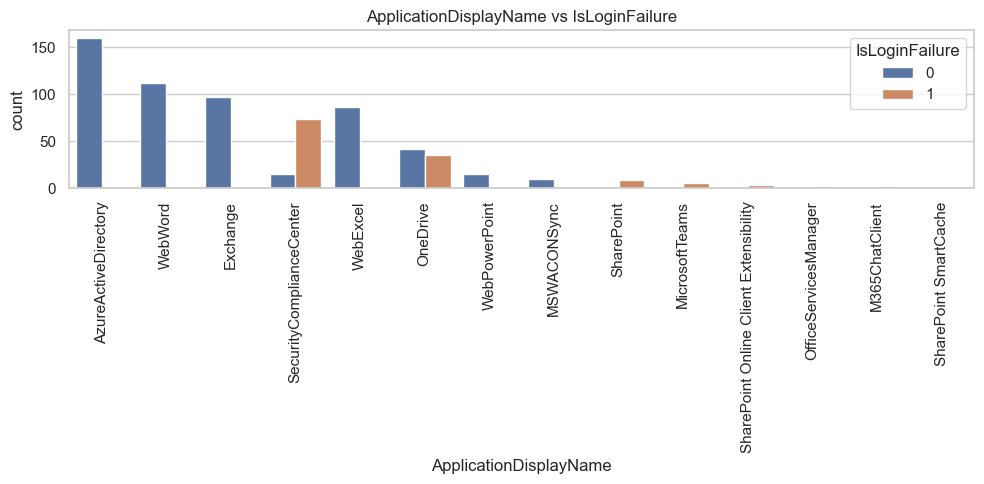

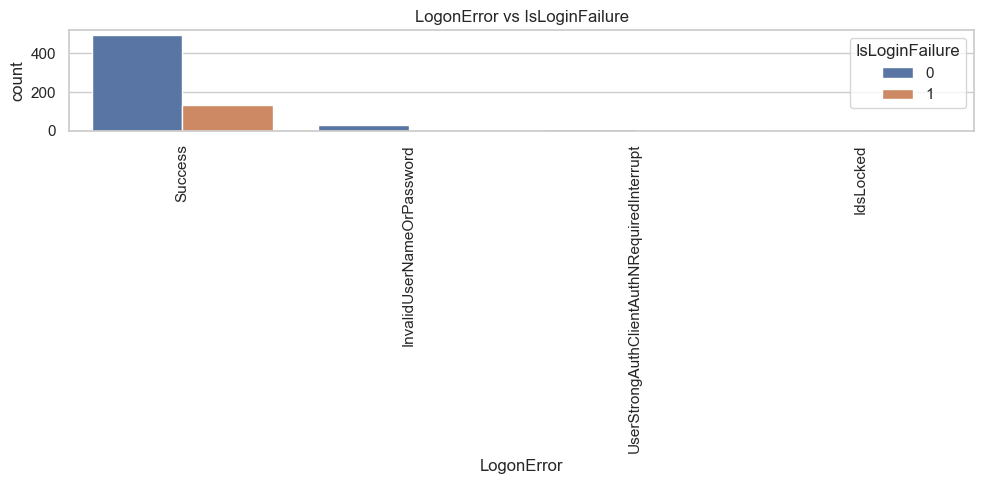

In [6]:
target = 'IsLoginFailure'

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue=target, order=df[col].value_counts().index)
    plt.title(f'{col} vs {target}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Bivariate – Risk Flags vs Target

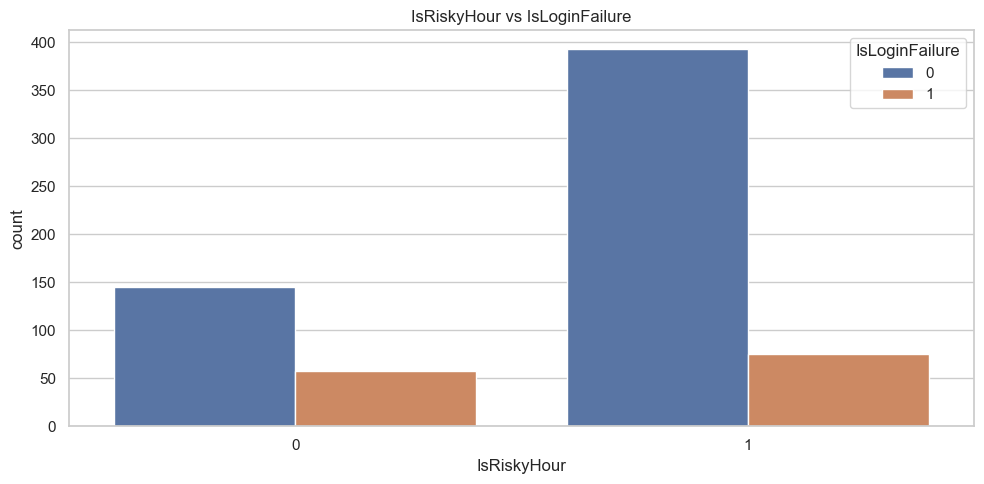

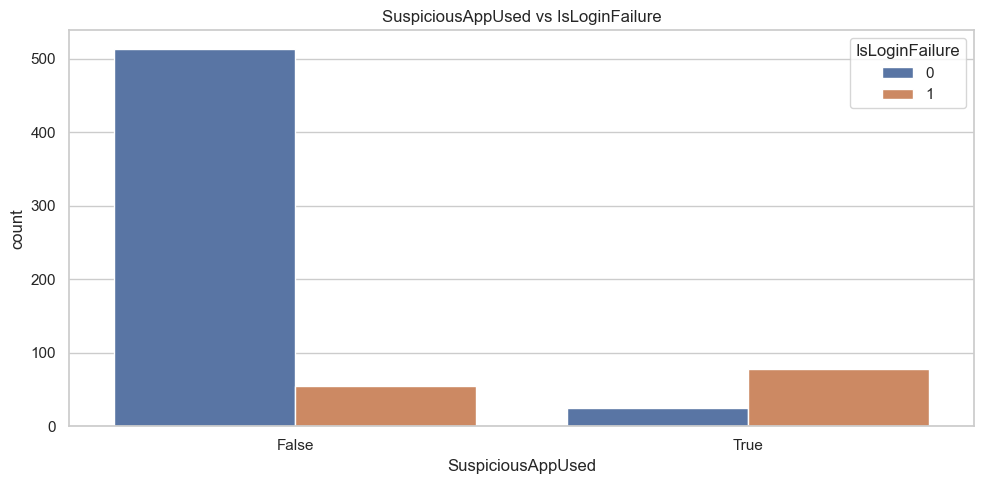

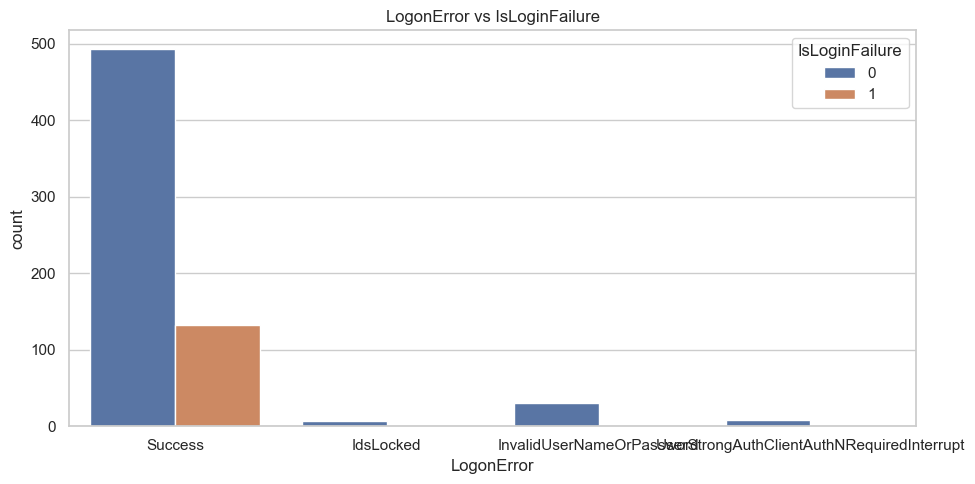

In [18]:
risk_cols = ['IsRiskyHour', 'SuspiciousAppUsed', 'LogonError']

for col in risk_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

In [20]:
# Convert 'IsThreat' column: True -> 1, False -> 0
df['IsThreat'] = df['IsThreat'].map({True: 1, False: 0})

# Optional: Save the updated DataFrame back to CSV
df.to_csv('Converted_dataset_for_Hypothesis.csv', index=False)

# 1). Implementing two way classification of Analysis of variance

In [22]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
# Loading  dataset
df = pd.read_csv('Converted_dataset_for_Hypothesis.csv')

In [26]:
data = pd.DataFrame(df)

In [38]:
# Performing Two-Way ANOVA
# From dataset, Operation and ApplicationDisplayName are categorial independent variables
# From dataset, IsThreat is the target or dependent variable

model = smf.ols('IsThreat ~ C(Operation) + C(ApplicationDisplayName) + C(Operation):C(ApplicationDisplayName)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 38, but rank is 8
  warnings.warn('covariance of constraints does not have full '
C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 494, but rank is 59
  warnings.warn('covariance of constraints does not have full '


In [40]:
# Print the ANOVA table
print(anova_table)

                                             sum_sq     df            F  \
C(Operation)                            3093.709602   38.0  8284.381329   
C(ApplicationDisplayName)                       NaN   13.0          NaN   
C(Operation):C(ApplicationDisplayName)   873.237935  494.0   179.874574   
Residual                                   5.984848  609.0          NaN   

                                        PR(>F)  
C(Operation)                               0.0  
C(ApplicationDisplayName)                  NaN  
C(Operation):C(ApplicationDisplayName)     0.0  
Residual                                   NaN  


# Hypothesis Statements :
# H0 = There is no significant differences between columns higher secondary subject and degree technical
# H1 = There are significant differences between columns higher secondary subject and degree technical

# As per ANOVA table, the calculated result of Probability values are not lesser than 0.05
# So we are accepting H0 (Null Hypothesis) and rejecting H1 (Alternate Hypothesis) which means there is no significant differences between two qualitative columns.

# 2). Testing the Analysis of Variance between RecordType and HourOfDay at signifance level 5%.(Make decision using Hypothesis Testing)

In [47]:
import scipy.stats as stats
stats.f_oneway(df['RecordType'],df['HourOfDay'])

F_onewayResult(statistic=109.82951622315929, pvalue=9.38880024495536e-25)

# Hypothesis Statements :
# H0 = There is no significant differences between columns RecordType and HourOfDay
# H1 = There are significant differences between columns RecordType and HourOfDay

# As per above output value of ANOVA function, the calculated result of Probability value is NOT lesser than 0.05 (5%)
# So we are accepting H0 (Null Hypothesis) and rejecting H1 (Alternate Hypothesis) which means there is NO significant differences between two quantitative columns.

# 3). Testing the similarity between the Operation(FileAccessed) and ApplicationDisplayName(Exchange) with respect to IsThreat at significance level of 5%.(Make decision using Hypothesis Testing)

In [63]:
# Independent sample - Unpaired T test
# Different Group ('FileAccessed', 'Exchange') but same condition (IsThreat)
from scipy.stats import ttest_ind
File_Accessed=df[df['Operation']=='FileAccessed']['IsThreat']
Exchange_Outlook = df[df['ApplicationDisplayName']=='Exchange']['IsThreat']
ttest_ind(File_Accessed,Exchange_Outlook)

C:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


TtestResult(statistic=48.69088723775734, pvalue=3.774058688483825e-112, df=198.0)

# Hypothesis Statements :
# H0 = There is no significant similarity between columns Operation(FileAccessed) and ApplicationDisplayName(Exchange) with respect to IsThreat
# H1 = There are significant similarity between columns Operation(FileAccessed) and ApplicationDisplayName(Exchange) with respect to IsThreat

# As per above output value of T-test function, the calculated result of Probability value is lesser than 0.05 (5%)

# So we are rejecting H0 (Null Hypothesis) and accepting H1 (Alternate Hypothesis) which means there is significant similarities between columns Operation(FileAccessed) and ApplicationDisplayName(Exchange) with respect to IsThreat.

# 4). Testing the similarity between the Operation(FileAccessed) with respect to HourOfDay and RecordType at significance level of 5%.(Make decision using Hypothesis Testing)

In [70]:
# Dependent sample - paired T test
# Same Group ('FileAccessed') but different condition (HourOfDay and RecordType)

from scipy.stats import ttest_rel
File_Accessed_HourOfDay = df[df['Operation']=='FileAccessed']['HourOfDay']
File_Accessed_RecordType = df[df['Operation']=='FileAccessed']['RecordType']
ttest_rel(File_Accessed_HourOfDay,File_Accessed_RecordType)


TtestResult(statistic=-1.3267611418572949, pvalue=0.18755035916608892, df=102)

# Hypothesis Statements :
# H0 = There is no significant similarity between columns Operation(FileAccessed) with respect to HourOfDay and RecordType
# H1 = There are significant similarity between columns Operation(FileAccessed) with respect to HourOfDay and RecordType

# As per above output value of T-test function, the calculated result of Probability value is lesser than 0.05 (5%)

# So we are rejecting H0 (Null Hypothesis) and accepting H1 (Alternate Hypothesis) which means there are significant similarities between columns Operation(FileAccessed) with respect to HourOfDay and RecordType